In [46]:
# Operating System
import os

import pickle
import json

#Pandas and Numpy
import pandas as pd
import numpy as np

#ramdom generator
import random

# from sklearn.model_selection import train_test_split

# from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
# from sklearn.base import TransformerMixin, BaseEstimator

# import category_encoders as ce
# from sklearn.preprocessing import KBinsDiscretizer, Binarizer

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix

# # Custom transformers
# from custom_transformers.transformer import Selector, TextSelector, NumberSelector, BoolSelector, TextCleanerTransformer

# #CURL requests
# import requests 

#Plots
import matplotlib.pyplot as plt
%matplotlib inline

# # Statistics
# from scipy.stats import binom_test

# Strings
import re


# Load data

In [2]:
file_path = os.path.join('heroku', 'heroku_db', 'heroku_complete_db.csv')

df_results = pd.read_csv(file_path,
                         sep=";",
                         # nrows = 100, 
                         header=0,
                         warn_bad_lines=True)



In [3]:
df_results.head()

,id,observation_id,observation,proba,true_class
0,3,0,"{""id"": 0, ""observation"": {""Department Name"": ""...",0.456029,0.0
1,4,1,"{""id"": 1, ""observation"": {""Department Name"": ""...",0.456029,0.0
2,5,2,"{""id"": 2, ""observation"": {""Department Name"": ""...",0.490537,1.0
3,6,3,"{""id"": 3, ""observation"": {""Department Name"": ""...",0.490537,1.0
4,7,4,"{""id"": 4, ""observation"": {""Department Name"": ""...",0.000000,0.0


In [4]:
observations_decoupled = df_results['observation'].apply(json.loads).apply(pd.Series)

In [5]:
observations_decoupled.head()

,id,observation
0,0,"{'Department Name': 'Vernon', 'InterventionDat..."
1,1,"{'Department Name': 'Vernon', 'InterventionDat..."
2,2,"{'Department Name': 'Milford', 'InterventionDa..."
3,3,"{'Department Name': 'Milford', 'InterventionDa..."
4,4,"{'Department Name': 'Norwalk', 'InterventionDa..."


In [6]:
df_obs = pd.DataFrame(list(observations_decoupled.observation), index=observations_decoupled.id)

In [7]:
df_obs.head()

,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator
id,,,,,,,,,,,,,
0,Vernon,05/16/2018 02:39:00 AM,VERNON,V,625,False,C,Registration,40.0,N,B,M,False
1,Vernon,05/16/2018 02:39:00 AM,VERNON,V,625,False,C,Registration,40.0,N,B,M,False
2,Milford,05/16/2018 04:08:00 AM,MILFORD,E,473,True,I,Other,49.0,N,B,F,False
3,Milford,05/16/2018 04:08:00 AM,MILFORD,E,473,True,I,Other,49.0,N,B,F,False
4,Norwalk,05/16/2018 09:38:00 AM,NORWALK,V,100000335,True,I,Defective Lights,35.0,N,W,M,True


In [8]:
df_obs['proba'] = df_results['proba']

In [9]:
df_obs['true_class'] = df_results['true_class']

In [10]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10002 entries, 0 to 900003
Data columns (total 15 columns):
Department Name                     10002 non-null object
InterventionDateTime                10002 non-null object
InterventionLocationName            10002 non-null object
InterventionReasonCode              10002 non-null object
ReportingOfficerIdentificationID    10002 non-null object
ResidentIndicator                   10002 non-null bool
SearchAuthorizationCode             10002 non-null object
StatuteReason                       10002 non-null object
SubjectAge                          10002 non-null float64
SubjectEthnicityCode                10002 non-null object
SubjectRaceCode                     10002 non-null object
SubjectSexCode                      10002 non-null object
TownResidentIndicator               10002 non-null bool
proba                               10000 non-null float64
true_class                          5000 non-null float64
dtypes: bool(2), float

In [95]:
df_obs_known = df_obs.dropna()

# Metrics

In [51]:
decision_thr = 0.5

In [52]:
# y_true = df_obs.dropna().true_class.astype(int)
# y_pred = df_obs.dropna().proba.apply(lambda x: x > decision_thr).astype(int)
# y_prob = df_obs.dropna().proba

In [96]:
y_true = df_obs_known.true_class.astype(int)
y_pred = df_obs_known.proba.apply(lambda x: x > decision_thr).astype(int)
y_prob = df_obs_known.proba

In [97]:
precision = precision_score(y_true, y_pred)
precision

0.6005416384563304

In [98]:
recall = recall_score(y_true, y_pred)
recall

0.49415041782729807

In [99]:
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.7004

In [100]:
print("Percentage of searches performed: {}%".format(y_pred.mean()*100))

Percentage of searches performed: 29.54%


In [101]:
cf = confusion_matrix(y_true, y_pred)
cf

array([[2615,  590],
       [ 908,  887]], dtype=int64)

In [102]:
TN = cf[0][0]
TP = cf[1][1]
FN = cf[1][0]
FP = cf[0][1]

Sanity checks:

In [103]:
precision == TP/(TP+FP) 

True

In [104]:
recall == TP/(TP+FN)

True

### Without model decision

In [105]:
TN2 = 0
TP2 = y_true.sum()
FN2 = 0
FP2 = (y_true==0).sum()

In [106]:
precision2 = TP2/(TP2+FP2)
precision2

0.359

In [107]:
recall2 = TP2/(TP2+FN2)
recall2

1.0

# Curves

In [56]:
fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
AUROC = roc_auc_score(y_true, y_prob)*100

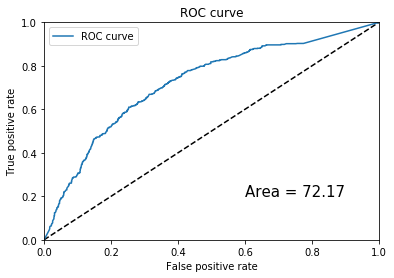

In [57]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.text(0.6, 0.2, "Area = {}".format(round(AUROC,2)), dict(size=15))

plt.legend(loc='best')
plt.show()

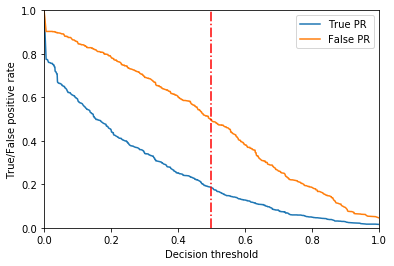

In [58]:
plt.figure(2)
plt.plot(thresholds_roc, fpr , label='True PR')
plt.plot(thresholds_roc, tpr, label='False PR')

plt.axvline(x=decision_thr, color='r', linestyle='-.')

plt.xlabel('Decision threshold')
plt.ylabel('True/False positive rate')
#plt.title('ROC curve')

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend(loc='best')
plt.show()

In [59]:
precision_vec, recall_vec, thresholds_pr = precision_recall_curve(y_true, y_prob)

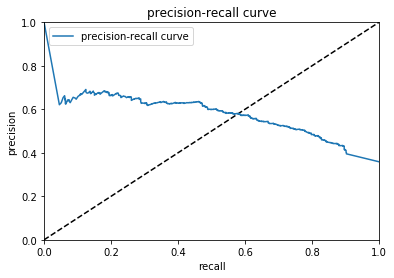

In [60]:
plt.figure(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(recall_vec, precision_vec, label='precision-recall curve')

plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision-recall curve')

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend(loc='best')
plt.show()

# Metrics among protected classes

## Deployed model

In [109]:
df_obs_classes = pd.DataFrame({df_obs_known.SubjectRaceCode.name: df_obs_known.SubjectRaceCode, 
                                df_obs_known.SubjectEthnicityCode.name: df_obs_known.SubjectEthnicityCode, 
                                df_obs_known.SubjectSexCode.name: df_obs_known.SubjectSexCode, 
                                'y_true': y_true, 
                                'y_pred': y_pred})

In [111]:
#sanity check
df_obs_classes.shape[0] == df_obs_known.shape[0]

True

In [112]:
obs_race_results = df_obs_classes.groupby(['SubjectRaceCode','y_true', 'y_pred']).SubjectRaceCode.count()
obs_ethnic_results = df_obs_classes.groupby(['SubjectEthnicityCode','y_true', 'y_pred']).SubjectEthnicityCode.count()
obs_sex_results = df_obs_classes.groupby(['SubjectSexCode','y_true', 'y_pred']).SubjectSexCode.count()

Sanity checks:

In [116]:
obs_race_results[:,1,:].sum() == obs_ethnic_results[:,1,:].sum() == obs_sex_results[:,1,:].sum() == y_true.sum()

True

In [117]:
obs_race_results[:,:,1].sum() == obs_ethnic_results[:,:,1].sum() == obs_sex_results[:,:,1].sum() == y_pred.sum()

True

In [118]:
df_obs_classes.head(10)

,SubjectRaceCode,SubjectEthnicityCode,SubjectSexCode,y_true,y_pred
id,,,,,
0,B,N,M,0,0
1,B,N,M,0,0
2,B,N,F,1,0
3,B,N,F,1,0
4,W,N,M,0,0
5,W,N,M,0,0
6,W,H,M,0,0
7,W,H,M,0,0
8,B,N,F,0,1


### Precision overall

In [119]:
precision_score(y_true, y_pred)

0.6005416384563304

In [120]:
# Sanity check
df_obs_classes[df_obs_classes.y_pred==1].y_true.mean()

0.6005416384563304

### Precision among races

Precision table:

In [121]:
df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectRaceCode').y_true.mean().apply(lambda x: x*100)

SubjectRaceCode
A    57.142857
B    59.292035
I    50.000000
W    60.476663
Name: y_true, dtype: float64

Max. difference:

In [123]:
(df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectRaceCode').y_true.mean().max() - df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectRaceCode').y_true.mean().min())*100

10.476663356504467

Max. difference [%]:

In [127]:
(1 - df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectRaceCode').y_true.mean().min() / df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectRaceCode').y_true.mean().max())*100

17.32348111658456

Standard difference:

In [128]:
df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectRaceCode').y_true.mean().apply(lambda x: x*100).std()

4.692719356742923

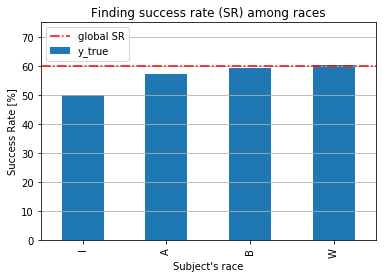

In [129]:
(df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectRaceCode')
                                              .y_true.mean().apply(lambda x: x*100).sort_values()
                                              .to_frame().plot.bar(label=''))

plt.axhline(y=precision*100, color='r', linestyle='-.', label='global SR')

plt.title('Finding success rate (SR) among races')
plt.xlabel("Subject's race")
plt.ylabel("Success Rate [%]")

plt.ylim(0,75)

plt.legend(loc='upper left')
plt.grid(axis='y')

#plt.savefig(os.path.join('plots', 'discrimination_race_SR.png'));

### Precision among ethnicities

When the classifier predicts positive, it is more sure about the prediction for Whites than for Blacks.

Precision table:

In [130]:
df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectEthnicityCode').y_true.mean().apply(lambda x: x*100)

SubjectEthnicityCode
H    55.747126
N    61.381754
Name: y_true, dtype: float64

Max. difference:

In [131]:
(df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectEthnicityCode').y_true.mean().max() - df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectEthnicityCode').y_true.mean().min())*100

5.634627327611652

Max. difference [%]:

In [132]:
(1 - df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectEthnicityCode').y_true.mean().min() / df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectEthnicityCode').y_true.mean().max())*100

9.179645386541925

Standard difference:

In [133]:
df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectEthnicityCode').y_true.mean().apply(lambda x: x*100).std()

3.9842831928132347

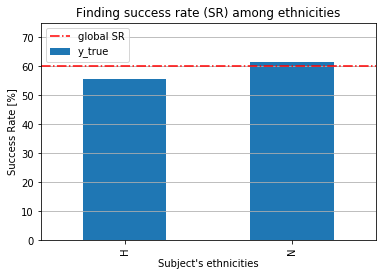

In [134]:
(df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectEthnicityCode')
                                              .y_true.mean().apply(lambda x: x*100).sort_values()
                                              .to_frame().plot.bar(label=''))

plt.axhline(y=precision*100, color='r', linestyle='-.', label='global SR')

plt.title('Finding success rate (SR) among ethnicities')
plt.xlabel("Subject's ethnicities")
plt.ylabel("Success Rate [%]")

plt.ylim(0,75)

plt.legend(loc='upper left')
plt.grid(axis='y')

#plt.savefig(os.path.join('plots', 'discrimination_race_SR.png'));

### Precision among sexes

Precision table:

In [135]:
df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectSexCode').y_true.mean().apply(lambda x: x*100)

SubjectSexCode
F    58.199357
M    60.548885
Name: y_true, dtype: float64

Max. difference [p.p.]:

In [136]:
(df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectSexCode').y_true.mean().max() - df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectSexCode').y_true.mean().min())*100

2.349528164003689

Max. difference [%]:

In [137]:
(1 - df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectSexCode').y_true.mean().min() / df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectSexCode').y_true.mean().max())*100

3.8803822085386686

Standard difference:

In [138]:
df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectSexCode').y_true.mean().apply(lambda x: x*100).std()

1.6613672973557905

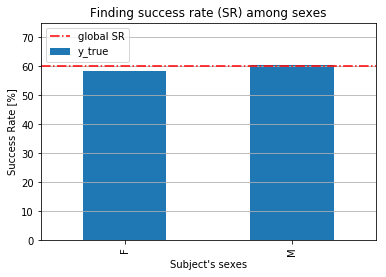

In [139]:
(df_obs_classes[df_obs_classes.y_pred==1].groupby('SubjectSexCode')
                                              .y_true.mean().apply(lambda x: x*100).sort_values()
                                              .to_frame().plot.bar(label=''))

plt.axhline(y=precision*100, color='r', linestyle='-.', label='global SR')

plt.title('Finding success rate (SR) among sexes')
plt.xlabel("Subject's sexes")
plt.ylabel("Success Rate [%]")

plt.ylim(0,75)

plt.legend(loc='upper left')
plt.grid(axis='y')

#plt.savefig(os.path.join('plots', 'discrimination_race_SR.png'));

---

---

---

---

## All requests (previous method; without model decision)

### Precision overall

In [148]:
y_true.mean()

0.359

In [147]:
precision2

0.359

### Precision among races

Precision table:

In [142]:
df_obs_classes.groupby('SubjectRaceCode').y_true.mean().apply(lambda x: x*100)

SubjectRaceCode
A    26.086957
B    34.512725
I    20.000000
W    36.753675
Name: y_true, dtype: float64

Max. difference:

In [143]:
(df_obs_classes.groupby('SubjectRaceCode').y_true.mean().max() - df_obs_classes.groupby('SubjectRaceCode').y_true.mean().min())*100

16.75367536753675

Max. difference [%]:

In [144]:
(1 - df_obs_classes.groupby('SubjectRaceCode').y_true.mean().min() / df_obs_classes.groupby('SubjectRaceCode').y_true.mean().max())*100

45.583673469387755

Standard difference:

In [145]:
df_obs_classes.groupby('SubjectRaceCode').y_true.mean().apply(lambda x: x*100).std()

7.736009897015541

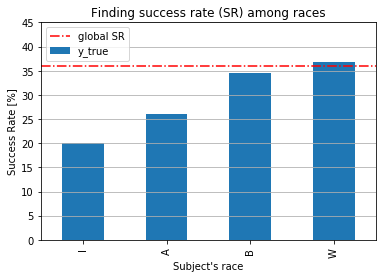

In [152]:
(df_obs_classes.groupby('SubjectRaceCode')
                                              .y_true.mean().apply(lambda x: x*100).sort_values()
                                              .to_frame().plot.bar(label=''))

plt.axhline(y=precision2*100, color='r', linestyle='-.', label='global SR')

plt.title('Finding success rate (SR) among races')
plt.xlabel("Subject's race")
plt.ylabel("Success Rate [%]")

plt.ylim(0,45)

plt.legend(loc='upper left')
plt.grid(axis='y')

#plt.savefig(os.path.join('plots', 'discrimination_race_SR.png'));

### Precision among ethnicities

When the classifier predicts positive, it is more sure about the prediction for Whites than for Blacks.

Precision table:

In [153]:
df_obs_classes.groupby('SubjectEthnicityCode').y_true.mean().apply(lambda x: x*100)

SubjectEthnicityCode
H    29.843750
N    37.983871
Name: y_true, dtype: float64

Max. difference:

In [154]:
(df_obs_classes.groupby('SubjectEthnicityCode').y_true.mean().max() - df_obs_classes.groupby('SubjectEthnicityCode').y_true.mean().min())*100

8.140120967741932

Max. difference [%]:

In [155]:
(1 - df_obs_classes.groupby('SubjectEthnicityCode').y_true.mean().min() / df_obs_classes.groupby('SubjectEthnicityCode').y_true.mean().max())*100

21.430467091295103

Standard difference:

In [156]:
df_obs_classes.groupby('SubjectEthnicityCode').y_true.mean().apply(lambda x: x*100).std()

5.755934735969122

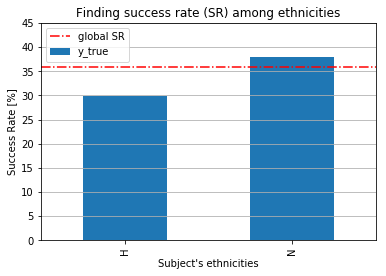

In [159]:
(df_obs_classes.groupby('SubjectEthnicityCode')
                                              .y_true.mean().apply(lambda x: x*100).sort_values()
                                              .to_frame().plot.bar(label=''))

plt.axhline(y=precision2*100, color='r', linestyle='-.', label='global SR')

plt.title('Finding success rate (SR) among ethnicities')
plt.xlabel("Subject's ethnicities")
plt.ylabel("Success Rate [%]")

plt.ylim(0,45)

plt.legend(loc='upper left')
plt.grid(axis='y')

#plt.savefig(os.path.join('plots', 'discrimination_race_SR.png'));

### Precision among sexes

Precision table:

In [160]:
df_obs_classes.groupby('SubjectSexCode').y_true.mean().apply(lambda x: x*100)

SubjectSexCode
F    31.866029
M    36.965866
Name: y_true, dtype: float64

Max. difference [p.p.]:

In [161]:
(df_obs_classes.groupby('SubjectSexCode').y_true.mean().max() - df_obs_classes.groupby('SubjectSexCode').y_true.mean().min())*100

5.099837284280695

Max. difference [%]:

In [162]:
(1 - df_obs_classes.groupby('SubjectSexCode').y_true.mean().min() / df_obs_classes.groupby('SubjectSexCode').y_true.mean().max())*100

13.796071449610226

Standard difference:

In [163]:
df_obs_classes.groupby('SubjectSexCode').y_true.mean().apply(lambda x: x*100).std()

3.606129526662864

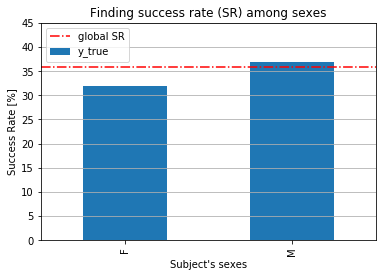

In [164]:
(df_obs_classes.groupby('SubjectSexCode')
                                              .y_true.mean().apply(lambda x: x*100).sort_values()
                                              .to_frame().plot.bar(label=''))

plt.axhline(y=precision2*100, color='r', linestyle='-.', label='global SR')

plt.title('Finding success rate (SR) among sexes')
plt.xlabel("Subject's sexes")
plt.ylabel("Success Rate [%]")

plt.ylim(0,45)

plt.legend(loc='upper left')
plt.grid(axis='y')

#plt.savefig(os.path.join('plots', 'discrimination_race_SR.png'));